In [1]:
%run Function_set.ipynb
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt

In [2]:
network,pos = Make_Question(3,3,Density = 0.85, option = "1-norm", distance = 2)

print(network)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0.]]


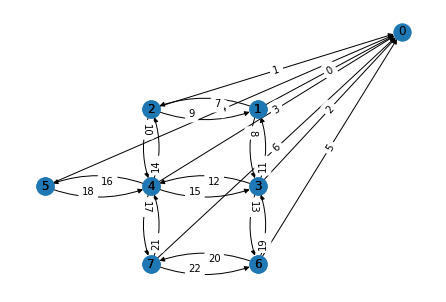

In [3]:
G, compelete_label, graph = complete_Graph(network,pos)

In [4]:
#compelete_label
G.edges

OutEdgeView([(1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 4), (3, 0), (3, 1), (3, 4), (3, 6), (4, 0), (4, 2), (4, 3), (4, 5), (4, 7), (5, 0), (5, 4), (6, 0), (6, 3), (6, 7), (7, 0), (7, 4), (7, 6)])

In [5]:
#pos

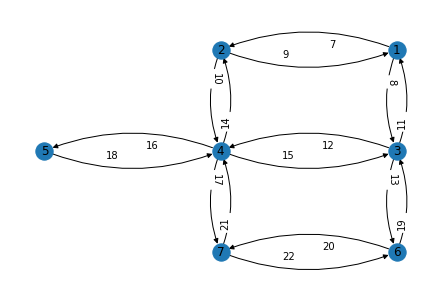

In [6]:
G_prime, sub_edge_label, sub_graph = sub_Graph (network,pos)

In [7]:
a = np.array([
              [1,2],
              [3,4],
              [1,4],
             ])
p = np.where(a[:,0]==1)
print(p)

(array([0, 2], dtype=int64),)


In [8]:
compelete_label

{(1, 0): '0',
 (2, 0): '1',
 (3, 0): '2',
 (4, 0): '3',
 (5, 0): '4',
 (6, 0): '5',
 (7, 0): '6',
 (1, 2): '7',
 (1, 3): '8',
 (2, 4): '10',
 (3, 4): '12',
 (3, 6): '13',
 (4, 5): '16',
 (4, 7): '17',
 (6, 7): '20',
 (2, 1): '9',
 (3, 1): '11',
 (4, 2): '14',
 (4, 3): '15',
 (5, 4): '18',
 (6, 3): '19',
 (7, 4): '21',
 (7, 6): '22'}

In [9]:
%run Function_set.ipynb
Final_map, lowest_edge_number = edge_map(G, compelete_label, sub_edge_label)

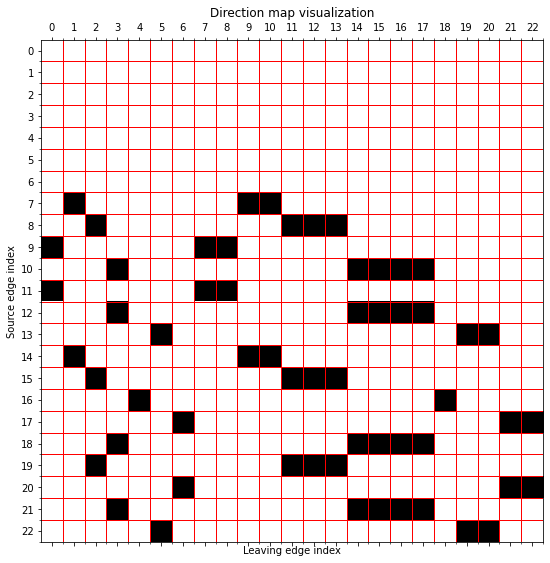

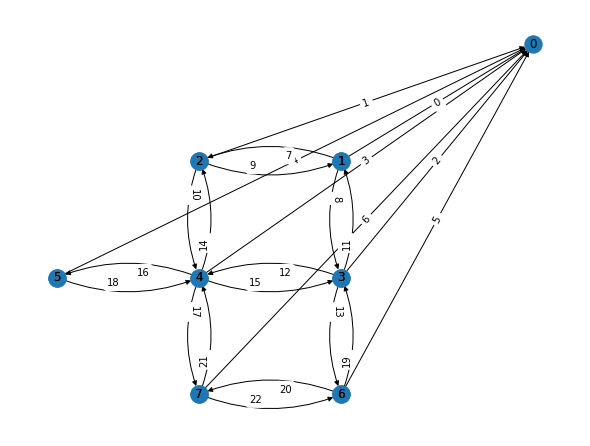

In [10]:
#matfig = plt.figure(figsize=(Final_map.shape[0],Final_map.shape[1]))
matfig = plt.figure(figsize=(9,9))
plt.matshow(Final_map,cmap=plt.cm.binary,fignum=matfig.number)
ax = plt.gca()
#plt.matshow(Final_map,cmap=plt.cm.binary)
plt.xlabel('Leaving edge index')
plt.ylabel('Source edge index')
plt.title ("Direction map visualization")

# Major ticks
ax.set_xticks(np.arange(0, Final_map.shape[0], step=1))
ax.set_yticks(np.arange(0, Final_map.shape[0], step=1))

# Labels for major ticks
ax.set_xticklabels(np.arange(0, Final_map.shape[0], step=1))
ax.set_yticklabels(np.arange(0, Final_map.shape[0], step=1))

# Minor ticks
ax.set_xticks(np.arange(0.5, Final_map.shape[0]+0.5, step=1), minor=True)
ax.set_yticks(np.arange(0.5, Final_map.shape[0]+0.5, step=1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='r', linestyle='-', linewidth=1)

plt.show()


plt.figure(2,figsize=(8,6)) 
_, _, _ = complete_Graph(network,pos)

In [11]:
# basic_cost shape => (1,number_of_edge)
# such as : basic_cost = np.vstack(np.ones(number_of_edge))
basic_cost = np.vstack(np.ones(len(compelete_label)))

QUBO_Obj = Objective(pos,compelete_label,basic_cost,flow_cost = 1)

In [34]:
#a = np.array([1,3,5])
#b = np.array([2,4,6,8,10,12])
#x,y = np.meshgrid(a,b)
#print(x,y)
#np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1)

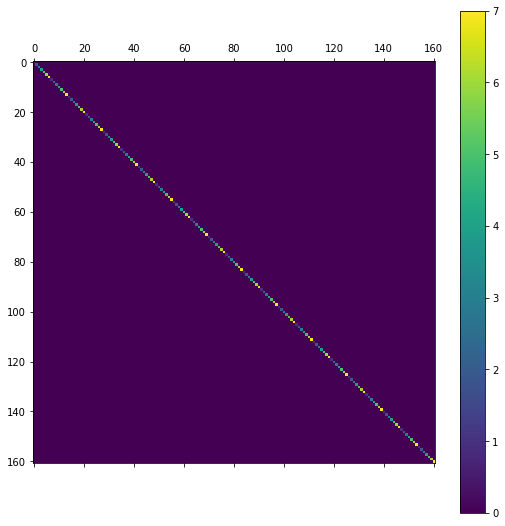

In [35]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Obj,fignum=matfig.number)
plt.colorbar()
plt.show()

In [36]:
QUBO_Constraint_1 = Constraint_1(pos,compelete_label,Final_map,penalty = 1)

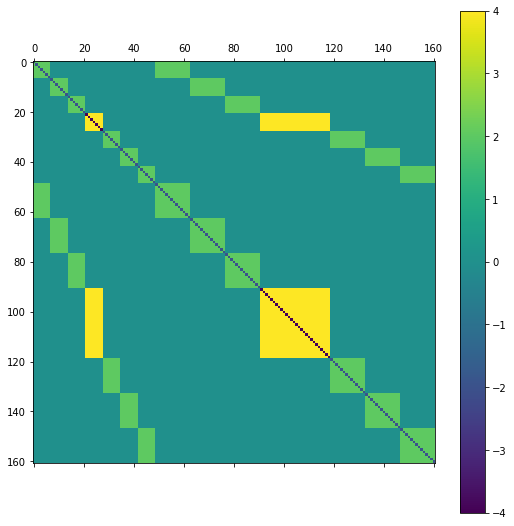

In [37]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_1,fignum=matfig.number)
plt.colorbar()
plt.show()

In [38]:
QUBO_Constraint_2 = Constraint_2(pos,compelete_label,Final_map,penalty = 1)

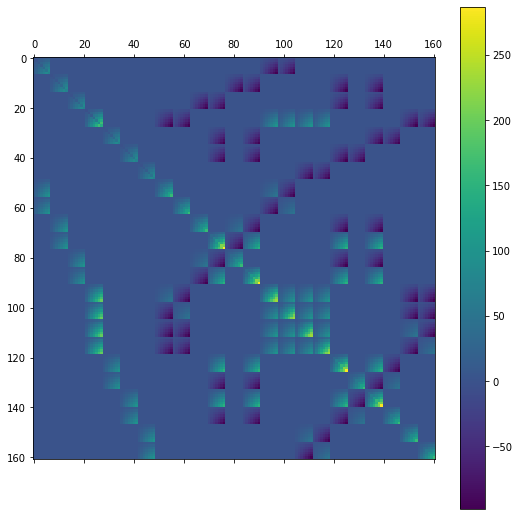

In [39]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_2,fignum=matfig.number)
plt.colorbar()
plt.show()

In [40]:
QUBO_matrix = QUBO_Obj + QUBO_Constraint_1 + QUBO_Constraint_2

print(np.shape(QUBO_matrix ))

(161, 161)


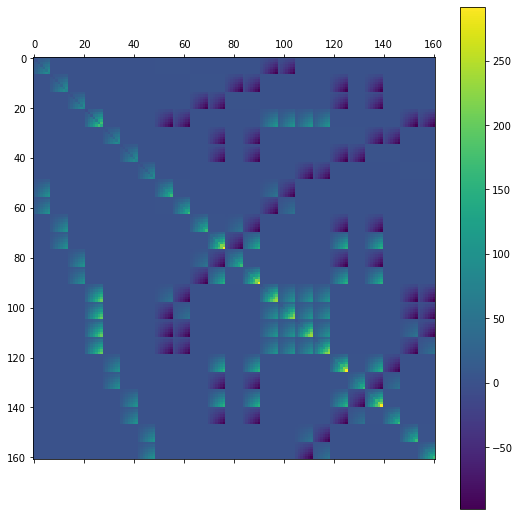

In [41]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

In [42]:
m_t_u,m_t_l = capacity_subtree_limit_generator(pos,lowest_edge_number)

QUBO_matrix_1 = Constraint_3_part_1(pos,compelete_label,lowest_edge_number,QUBO_matrix,m_t_u,penalty = 1)
QUBO_matrix_2 = Constraint_3_part_2(pos,compelete_label,lowest_edge_number,QUBO_matrix_1,m_t_l,penalty = 1)

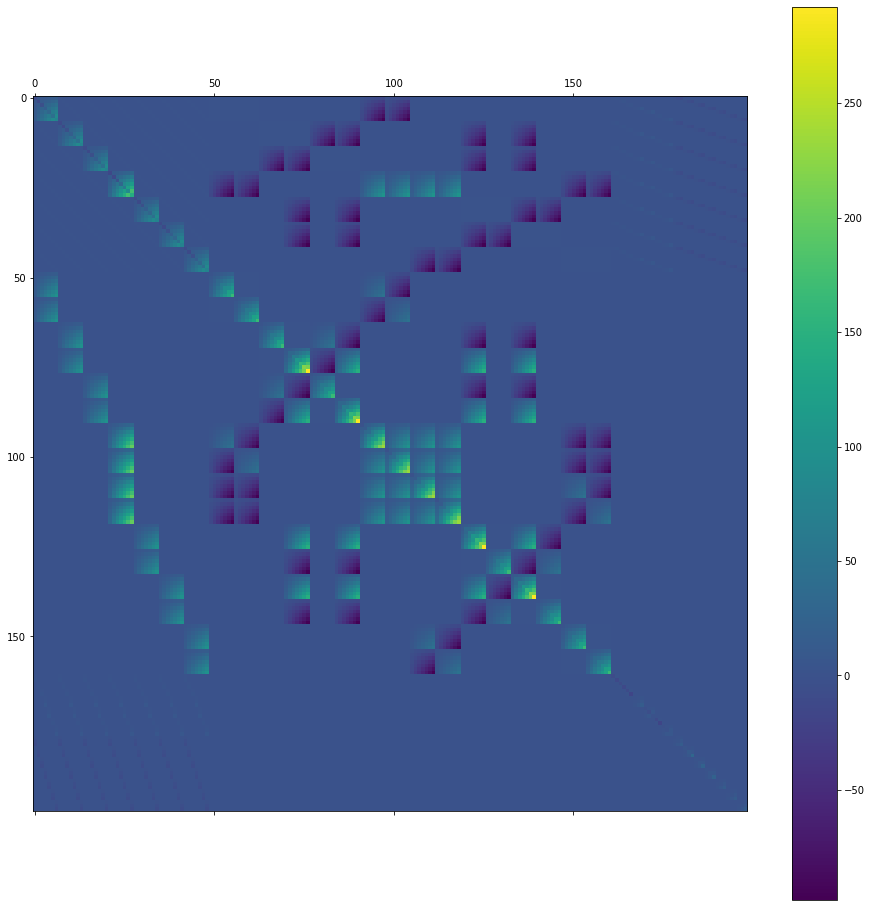

In [43]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_matrix_2,fignum=matfig.number)
plt.colorbar()
plt.show()

In [44]:
Ban_map = np.zeros((lowest_edge_number*(len(pos)-1)))

QUBO_Constraint_4 = Constraint_4(lowest_edge_number,Ban_map,penalty = 100)

QUBO_matrix_2[:lowest_edge_number*(len(pos)-1),:lowest_edge_number*(len(pos)-1)] +=  QUBO_Constraint_4

Final_QUBO_matrix = QUBO_matrix_2

print(np.shape(Final_QUBO_matrix))

(199, 199)


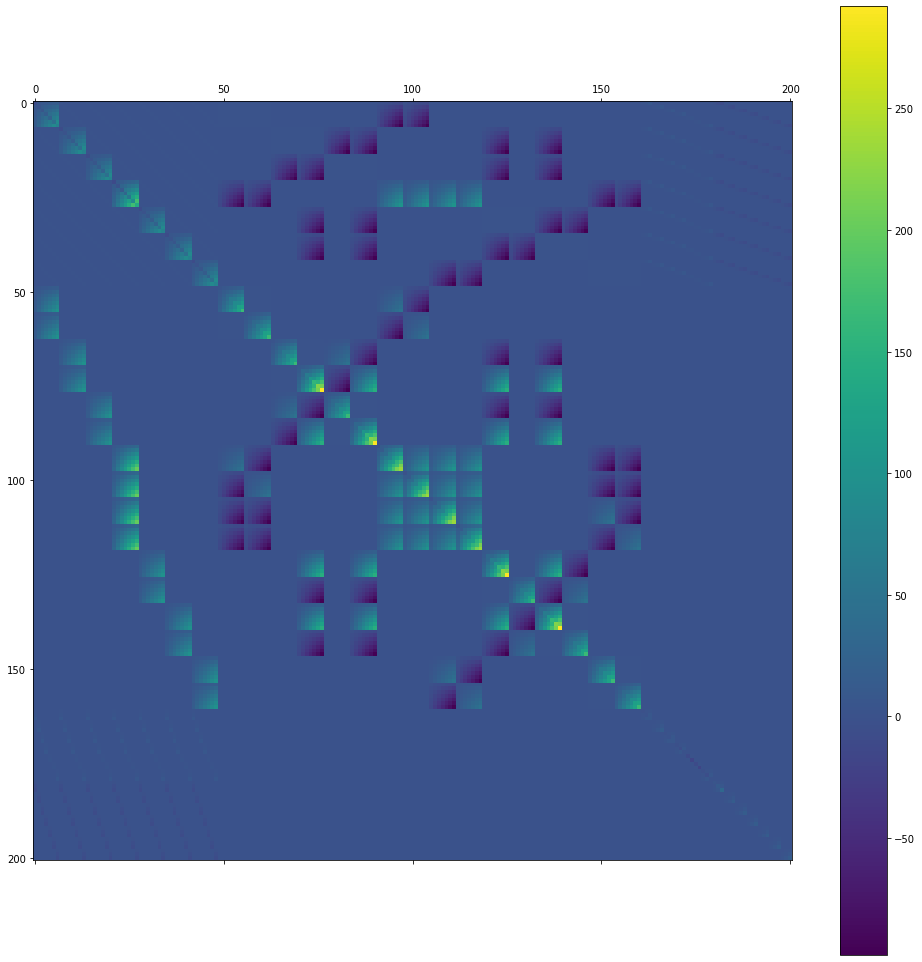

In [33]:
matfig = plt.figure(figsize=(17,17)) 
plt.matshow(QUBO_matrix_2,fignum=matfig.number)
plt.colorbar()
plt.show()